<a href="https://colab.research.google.com/github/MikeSalnikov/Data-analysis-algorithms/blob/main/HW2_web2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание № 2

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Генерация датасета и масштабирование признаков:

In [2]:
# сгенерирую набор данных:

X, Y, coef = datasets.make_regression(n_samples=10000, n_features=8, n_informative=4, n_targets=1, 
                                      noise=6, coef=True, random_state=42)
X[:, 0] *= 10
display(X, Y, coef)

array([[-2.63517488e+00, -1.94227609e-01, -3.00651018e-01, ...,
         3.68649105e-03,  1.02164358e-01, -8.55672468e-01],
       [-2.14527924e+00, -2.05058762e-01,  5.78282510e-01, ...,
         8.21585842e-01,  1.18900297e+00,  6.14952051e-01],
       [-1.33297624e+01, -9.70187637e-01,  9.56249150e-01, ...,
         3.89184674e-01,  1.69134960e+00,  4.75056731e-01],
       ...,
       [-1.58755675e+01,  8.07255428e-01,  1.23495931e-01, ...,
         1.40742494e-01,  2.25551698e+00,  7.35793054e-01],
       [ 4.66271260e+00,  1.40303343e+00,  1.79497864e+00, ...,
        -6.26940636e-01,  1.66249877e+00,  1.09012062e+00],
       [-2.60679997e+01,  4.40261373e-01,  2.48677234e+00, ...,
         4.34703067e-01,  2.10490264e-01, -9.70913966e-02]])

array([ 20.48301797, 243.54426725,  95.87279015, ..., 125.63170586,
        -6.18418528,  21.00111381])

array([ 0.        ,  3.66507269,  0.        , 90.01220329,  0.        ,
       32.15627061, 32.4082865 ,  0.        ])

In [3]:
# получаю средние значения и стандартное отклонение по столбцам: 

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву

display(means, stds)

array([ 0.0839154 , -0.00361983,  0.0053567 , -0.00709074,  0.00025014,
        0.00870873,  0.00039231, -0.00272245])

array([10.01585521,  1.01727907,  1.00157068,  0.99695958,  0.9962684 ,
        1.0003933 ,  1.00079387,  0.99489792])

In [4]:
# вычитаю каждое значение признака из среднего и делю на стандартное отклонение: 

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [5]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)
# видно, что среднее максимально стремится к нулю, отклонение в единице

array([ 1.96731520e-17, -8.43991543e-17,  1.95399252e-18,  1.85768068e-17,
        8.82849349e-17,  3.01036973e-17, -4.59465799e-17, -3.13776782e-17])

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
# реализую функцию, определяющую среднеквадратичную ошибку: 

def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Реализация градиентного спуска:

In [7]:
np.random.seed(1234)

# в моем датасете 2 признака и 1000 объектов: 
n_features = X.shape[1]
n_objects = X.shape[0]

# генерирую вектор истинных весов: 
w_true = np.random.normal(size=(n_features))

# возьму нулевые начальные веса: 
w = np.zeros(n_features)

In [8]:
display(w, w_true, X, Y)

array([0., 0., 0., 0., 0., 0., 0., 0.])

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ])

array([[-0.27147859, -0.1873702 , -0.30552783, ..., -0.00502027,
         0.10169132, -0.85732415],
       [-0.22256658, -0.19801738,  0.57202734, ...,  0.81255753,
         1.18766781,  0.62084208],
       [-1.33924438, -0.9501501 ,  0.94940124, ...,  0.38032636,
         1.68961597,  0.48022935],
       ...,
       [-1.59342188,  0.79710208,  0.11795396, ...,  0.13198185,
         2.25333583,  0.74230279],
       [ 0.45715489,  1.38276044,  1.78681542, ..., -0.63539946,
         1.66078802,  1.09844743],
       [-2.61105164,  0.43634163,  2.47752424, ...,  0.42582686,
         0.2099313 , -0.0948529 ]])

array([ 20.48301797, 243.54426725,  95.87279015, ..., 125.63170586,
        -6.18418528,  21.00111381])

In [9]:
# вычисляю вектор весов по нормальному уравнению линейной регрессии: 

normal_eq_w = np.linalg.inv(np.dot(X.T, X)) @ X.T @ Y
print(f'Веса {normal_eq_w}')
print(f'В случае использования нормального уравнения функционал ошибки составляет ', end='')
print(f'{round(mserror(X, normal_eq_w, Y), 4)}')

Веса [-1.20643704e-03  3.71720530e+00  3.73517346e-02  8.97162514e+01
  9.47628105e-02  3.20945848e+01  3.23875421e+01  4.15276401e-04]
В случае использования нормального уравнения функционал ошибки составляет 36.1975


In [10]:
# возьму нулевые начальные веса
w = np.zeros(n_features)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_gd = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# задаю начальную разницу весов большим числом (+бесконечность)
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors_gd.append(error)
    
    print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_gd[-1], 4)}')

Iter 0: error - 9733.099521256452, weights: [ 1.14227002e-02  7.72480200e-02 -8.68642466e-03  1.79371445e+00
 -8.54768280e-03  6.23624071e-01  6.38256865e-01  1.03940492e-03]
Iter 1: error - 9350.801823688418, weights: [ 2.23833879e-02  1.52889208e-01 -1.70116066e-02  3.55156424e+00
 -1.67119554e-02  1.23513487e+00  1.26392859e+00  2.04239526e-03]
Iter 2: error - 8983.578602910902, weights: [ 3.28960680e-02  2.26957015e-01 -2.49865033e-02  5.27426652e+00
 -2.45048096e-02  1.83476760e+00  1.87726348e+00  3.00991538e-03]
Iter 3: error - 8630.835354526407, weights: [ 4.29743681e-02  2.99484194e-01 -3.26217788e-02  6.96252410e+00
 -3.19379094e-02  2.42275289e+00  2.47850492e+00  3.94288827e-03]
Iter 4: error - 8292.00102401327, weights: [ 5.26315481e-02  3.70502818e-01 -3.99278106e-02  8.61702575e+00
 -3.90225992e-02  2.99931690e+00  3.06789151e+00  4.84221603e-03]
Iter 5: error - 7966.52708160318, weights: [ 6.18805094e-02  4.40044289e-01 -4.69146977e-02  1.02384464e+01
 -4.57699120e-02  

Text(0, 0.5, 'MSE')

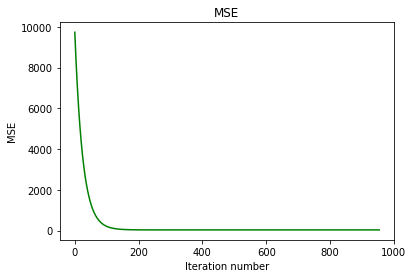

In [11]:
# визуализирую изменение функционала ошибки для градиентного спуска: 

plt.plot(range(len(errors_gd)), errors_gd, color='g', label='gd')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Реализация стохастического градиентного спуска:

In [12]:
%%time
# инициализирую начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgd = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом (+бесконечность)
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход стохастического градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерирую случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors_sgd.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_sgd[-1], 4)}')

Iteration #0: W_new = [ 7.79598898  0.94421413  1.37379859 10.73624656 -1.10724756 -2.99800329
 -3.73753639 -2.86956588], MSE = 8826.34
Iteration #100: W_new = [-1.80111149  6.39735561  1.41827479 71.29141801 -4.67847484 24.76525065
 25.30230626  0.44281067], MSE = 511.85
Iteration #200: W_new = [-1.01124154  2.73441031  0.62422405 88.11204634 -0.3686634  32.38215391
 30.67230914 -1.39089856], MSE = 46.4
Iteration #300: W_new = [ 8.98413789e-02  3.75520731e+00  1.05171284e+00  8.94641312e+01
 -5.62346762e-02  3.24158838e+01  3.22348641e+01 -1.39458737e+00], MSE = 39.34
Iteration #400: W_new = [ 0.59514746  3.51623976  0.81017792 89.95188935  0.52432923 32.63715255
 32.16747817 -1.09239139], MSE = 38.88
Iteration #500: W_new = [ 0.51323171  4.13831172  0.99535632 90.0966782  -0.42701364 30.58192728
 32.02448389  0.24549575], MSE = 40.44
Iteration #600: W_new = [ 1.84751683  3.97108828  1.07474791 89.86100646 -0.16118818 32.63129151
 32.34589086  0.40572694], MSE = 41.32
Iteration #700: 

Text(0, 0.5, 'MSE')

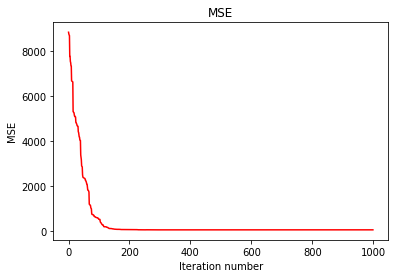

In [13]:
# визуализирую изменение функционала ошибки для стохастического градиентного спуска:

plt.plot(range(len(errors_sgd)), errors_sgd, color='r', label='sgd')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

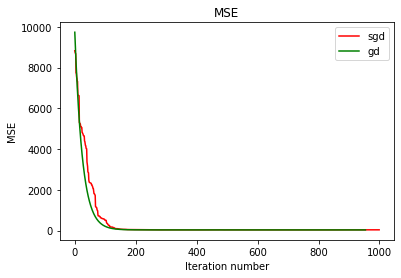

In [14]:
# строю графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов:

plt.plot(range(len(errors_sgd)), errors_sgd, label='sgd', color='r')
plt.plot(range(len(errors_gd)), errors_gd, label='gd', color='g')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(loc='best')

Вывод о разнице скорости сходимости каждого из методов: при одних и тех же параметрах (eta=0.01, max_iter = 1e3) видно, что зеленый график - градиентный спуск - быстрее (на меньшей итерации) уменьшает среднюю квадратическую ошибку. 